## Data Analysis

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
hungarian_heart_disease_data <- read.csv(url, header = FALSE, na.strings = "?", stringsAsFactors = TRUE)
colnames(hungarian_heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "hal", "num")
hungarian_heart_disease_data <- mutate(hungarian_heart_disease_data, num = as_factor(num))

# tidy_hungarian_heart_disease_data <- hungarian_heart_disease_data |>
#     mutate(patient_id = row_number())


# heart_disease_data_scaled <- tidy_hungarian_heart_disease_data |> 
#     select(age:thal) |>
#     mutate_all(scale, center = TRUE) |>
#     bind_cols(tidy_hungarian_heart_disease_data |> select(patient_id, num))

    
heart_disease_relevant <- hungarian_heart_disease_data|>
    select(-slope, -ca, -hal)

heart_disease_relevant$num <- as_factor(heart_disease_relevant$num)

glimpse(heart_disease_relevant)


Rows: 294
Columns: 11
$ age      <int> 28, 29, 29, 30, 31, 32, 32, 32, 33, 34, 34, 34, 35, 35, 35, 3…
$ sex      <int> 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0…
$ cp       <int> 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 4, 2, 2, 2, 3, 3, 3, 2…
$ trestbps <int> 130, 120, 140, 170, 100, 105, 110, 125, 120, 130, 150, 98, 12…
$ chol     <int> 132, 243, NA, 237, 219, 198, 225, 254, 298, 161, 214, 220, 16…
$ fbs      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ restecg  <int> 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0…
$ thalach  <int> 185, 160, 170, 170, 150, 165, 184, 155, 185, 190, 168, 150, 1…
$ exang    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ oldpeak  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ num      <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


### **We removed columns slope (slope of the peak exercise ST segment), ca (number of major vessels), hal (histidine ammonia-lyase (HAL) gene) due to the fact that majority of the data is NA, which will be very supportive in developing our prediciton model.**

In [4]:
# #NUMERICAL predictor
#         ### Difference between diagnosed and not diagnosed: 
#                     #thalach (maximum heart rate) > chol (cholesterol) > age

# ggplot(hungarian_heart_disease_data, aes(x = num,y=age)) +   
#   geom_boxplot() +
#     geom_point()+
#     labs(x='Diagnosis (0=no,1=yes)',y= 'Age')
#     #not much difference in distribution between those diagnosed and those not diagnosed

# ggplot(hungarian_heart_disease_data, aes(x = num,y=thalach)) +   
#   geom_boxplot() +
#     geom_point() +
#     labs(x='Diagnosis (0=no,1=yes)',y= 'Maximum Heart Rate')
#     #more apparent difference in distribution between those diagnosed and those not diagnosed

# ggplot(hungarian_heart_disease_data, aes(x = num,y=chol)) +   
#   geom_boxplot() +
#     geom_point() +
#     labs(x='Diagnosis (0=no,1=yes)',y= 'Cholesterol Levels')
#     #some difference in distribution between those diagnosed and those not diagnosed



# #CATEGORICAL predictor
#          ### Difference between diagnosed and not diagnosed: 
#                     # cp (chest pain) > restecg (resting ECG)

# ggplot(hungarian_heart_disease_data,aes(x=restecg, fill= num)) +
#    geom_bar(position='fill') +
#     labs(x='Rest ECG score', y= 'Count', fill='Diagnosis (0=no,1=yes)')
#         #Score 1 and 2 have similar count in diagnosed vs non-diagnosed, score 3 100% non-diagnosed
    


# ggplot(hungarian_heart_disease_data,aes(x=cp, fill= num)) +
#    geom_bar(position='fill') +
#     labs(x='Chest Pain types',y= 'Count', fill='Diagnosis (0=no,1=yes)')
#         #All 4 types of chest pain have different count in diagnosed vs non-diagnosed



Warning message:
“Removed 35 rows containing non-finite values (stat_density).”


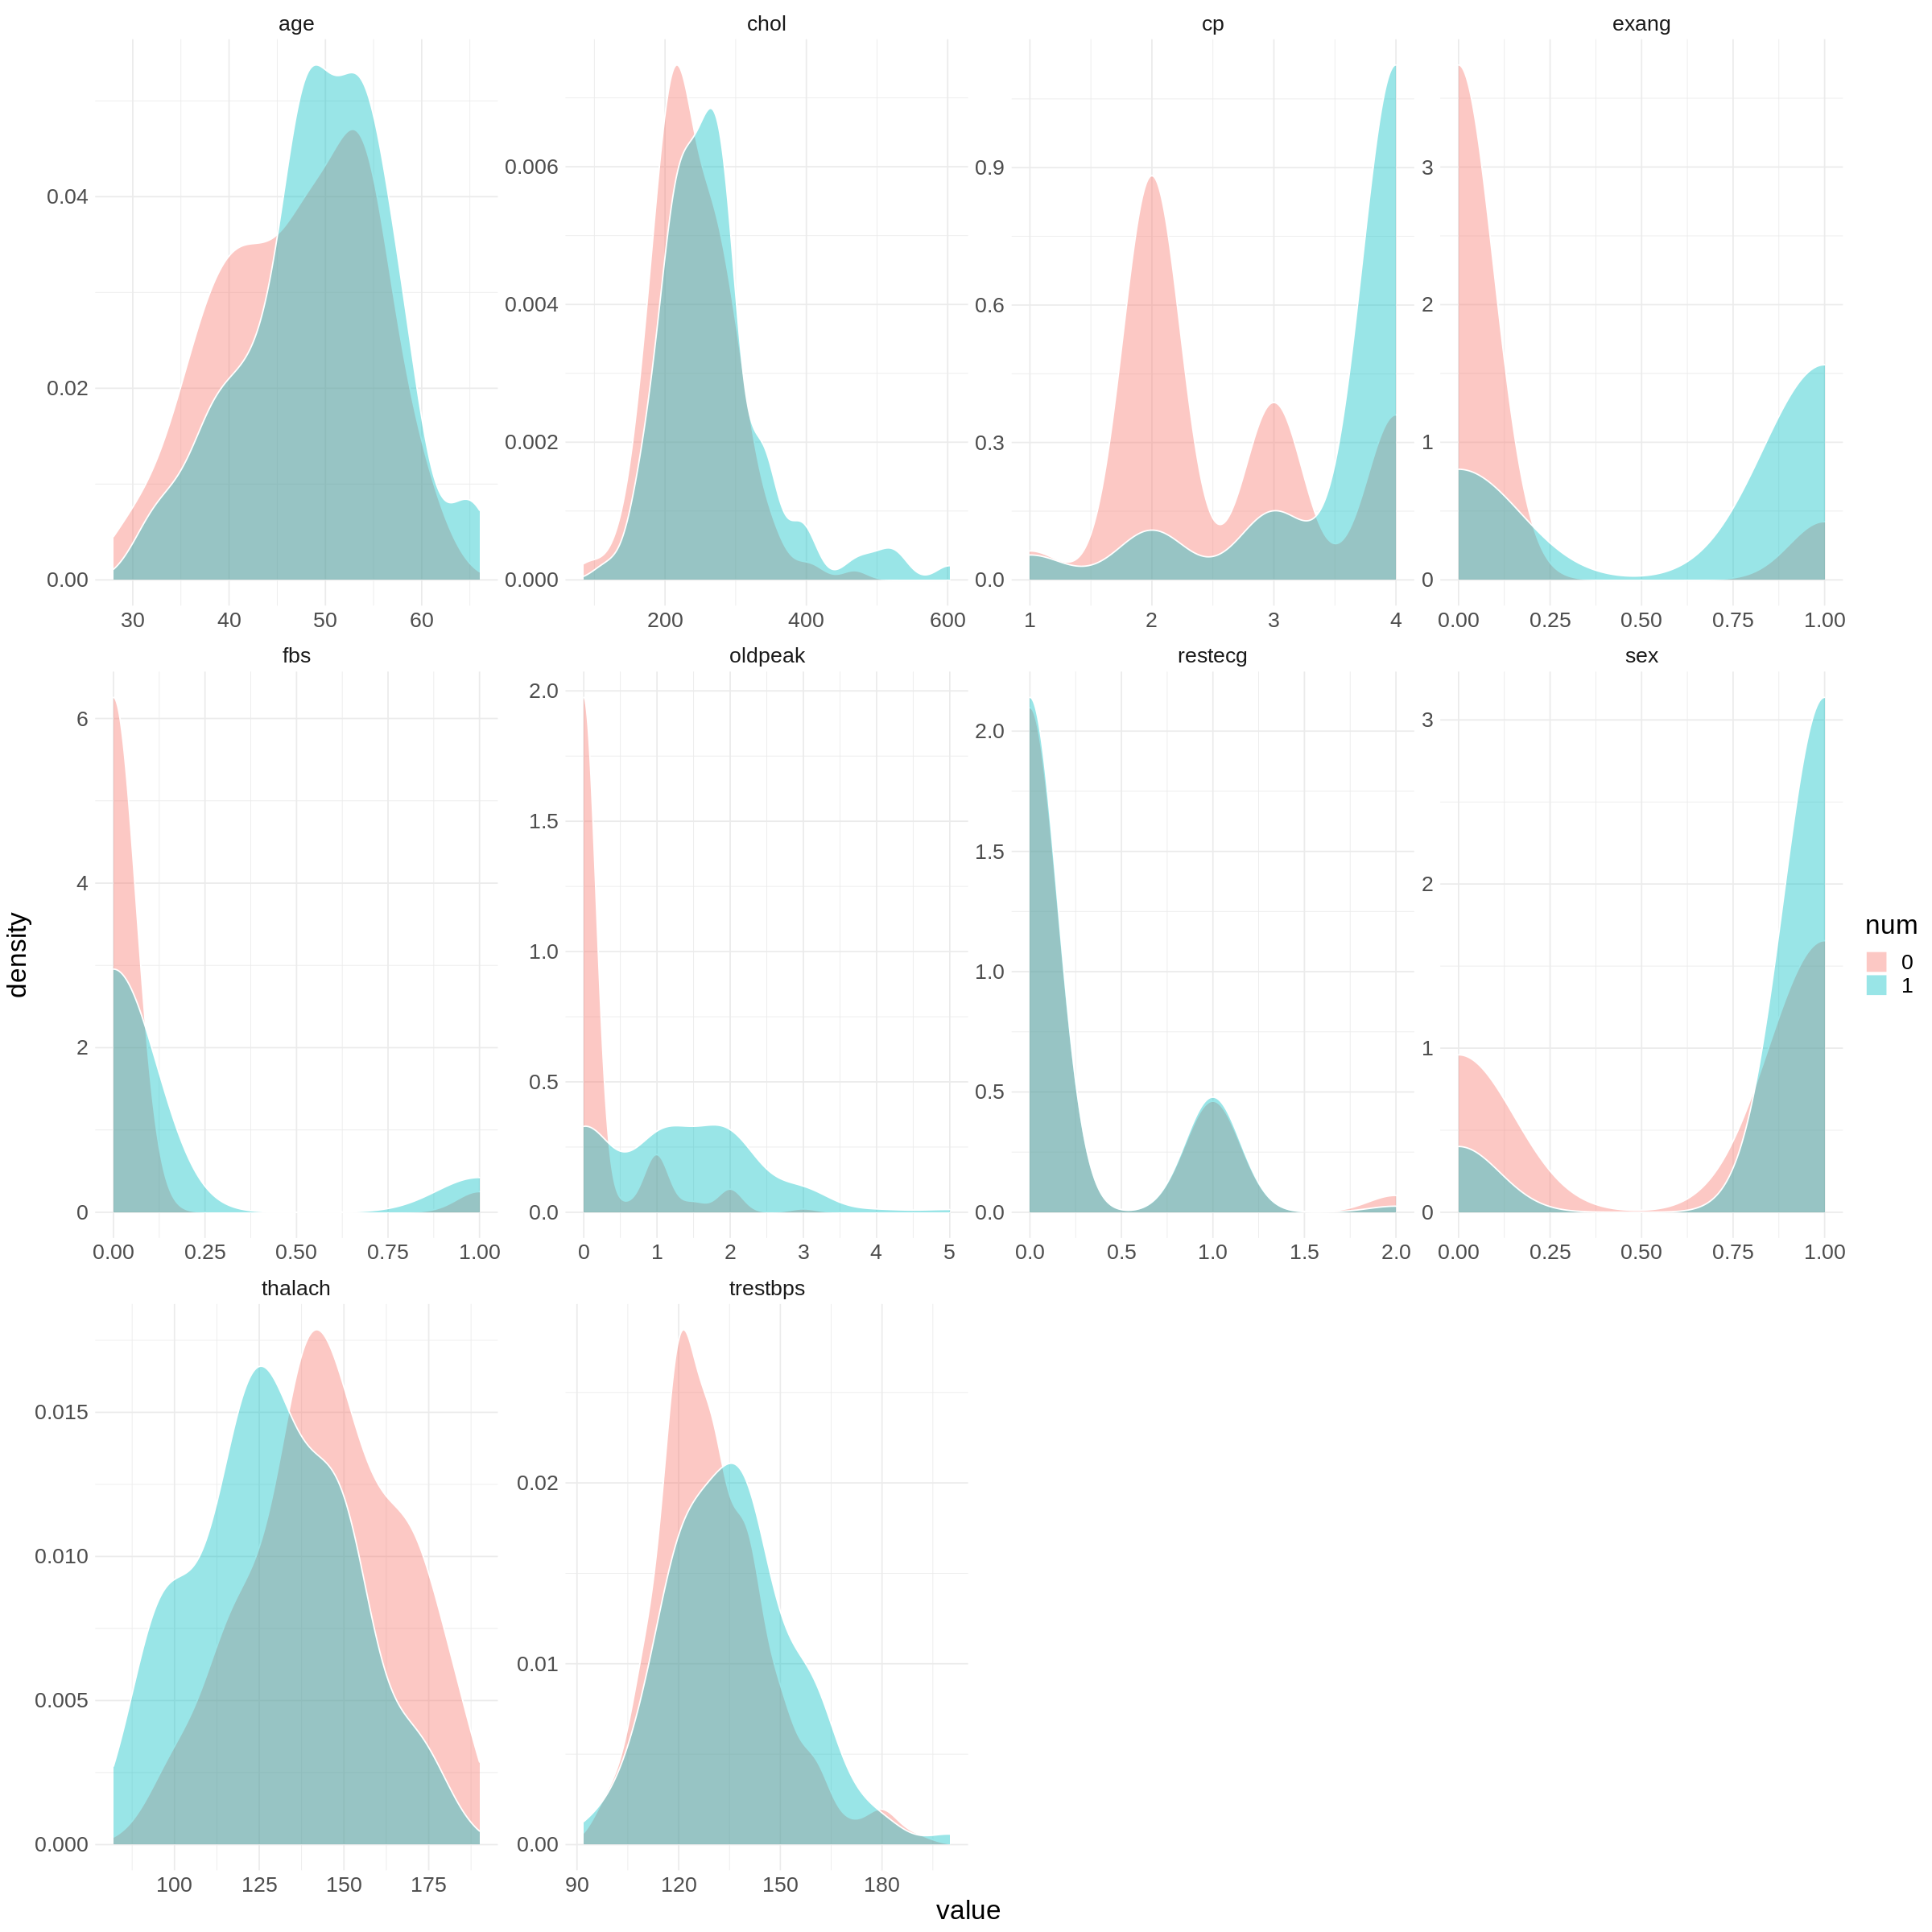

In [5]:
options(repr.plot.width = 20, repr.plot.height = 20)

heart_disease_relevant |>
    pivot_longer(cols = -num, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = num)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20)) 

## ****** ^ TODO: RENAME TITLES OF GRAPHS


### **Judging from the distribution of the variables in relation to diagnosis or non-diagnosis of heart disease, we would pick numerical variables, age and thalach (maximum heart rate achieved), and a categorical variable, cp (chest pain types). We chose these because they differ the most in distribution between diagnosis and non-diagnosis of heart disease.**

### Perform K-nearest Neighbour Classification

Select the predictors and response variable. Scale and center the selected variables.

In [6]:
heart_disease_scaled <- heart_disease_relevant |> 
                        select(num, age, thalach) |>
                        mutate(age = scale(age, center = TRUE), 
                        thalach = scale(thalach, center = TRUE))
head(heart_disease_scaled)

,num,age,thalach
,<fct>,"<dbl[,1]>","<dbl[,1]>"
1,0,-2.538019,1.9445017
2,0,-2.410008,0.8847193
3,0,-2.410008,1.3086323
4,0,-2.281997,1.3086323
5,0,-2.153985,0.4608064
6,0,-2.025974,1.0966758


Split the dataset into training and test set.

In [1]:
set.seed(4000)

heart_disease_split <- initial_split(heart_disease_relevant, prop = 0.75, strata = num)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)
head(heart_disease_train)
head(heart_disease_test)

ERROR: Error in initial_split(heart_disease_relevant, prop = 0.75, strata = num): could not find function "initial_split"


Pass the vector and the predictors to the recipe function.

In [158]:
heart_disease_recipe <- recipe(num ~ age + thalach, data = heart_disease_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())
heart_disease_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

To enhance the performance of the model by selecting the appropriate number of neighbors, 5-fold cross-validation is used for more accurate accuracy estimation.

In [159]:
set.seed(4000)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")
vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)
k_vals <- tibble(neighbors = seq(from = 2, to = 10, by = 1))

knn_results <- workflow() |>
  add_recipe(heart_disease_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = vfold, grid = k_vals) |>
  collect_metrics()
accuracies <- filter(knn_results, .metric == "accuracy")
accuracies

x Fold1: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ! Problem while computing `.row = orig_rows`.
  ✖ `.row` must be size 44 or 1, not 45.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5889271,4,0.02783375,Preprocessor1_Model1
3,accuracy,binary,0.6572410,4,0.03037043,Preprocessor1_Model2
4,accuracy,binary,0.6515592,4,0.02935219,Preprocessor1_Model3
5,accuracy,binary,0.6746829,4,0.03998121,Preprocessor1_Model4
6,accuracy,binary,0.6748150,4,0.04191412,Preprocessor1_Model5
7,accuracy,binary,0.6631871,4,0.04605359,Preprocessor1_Model6
8,accuracy,binary,0.6688689,4,0.04982021,Preprocessor1_Model7
9,accuracy,binary,0.7143235,4,0.03265890,Preprocessor1_Model8
10,accuracy,binary,0.7143235,4,0.03265890,Preprocessor1_Model9


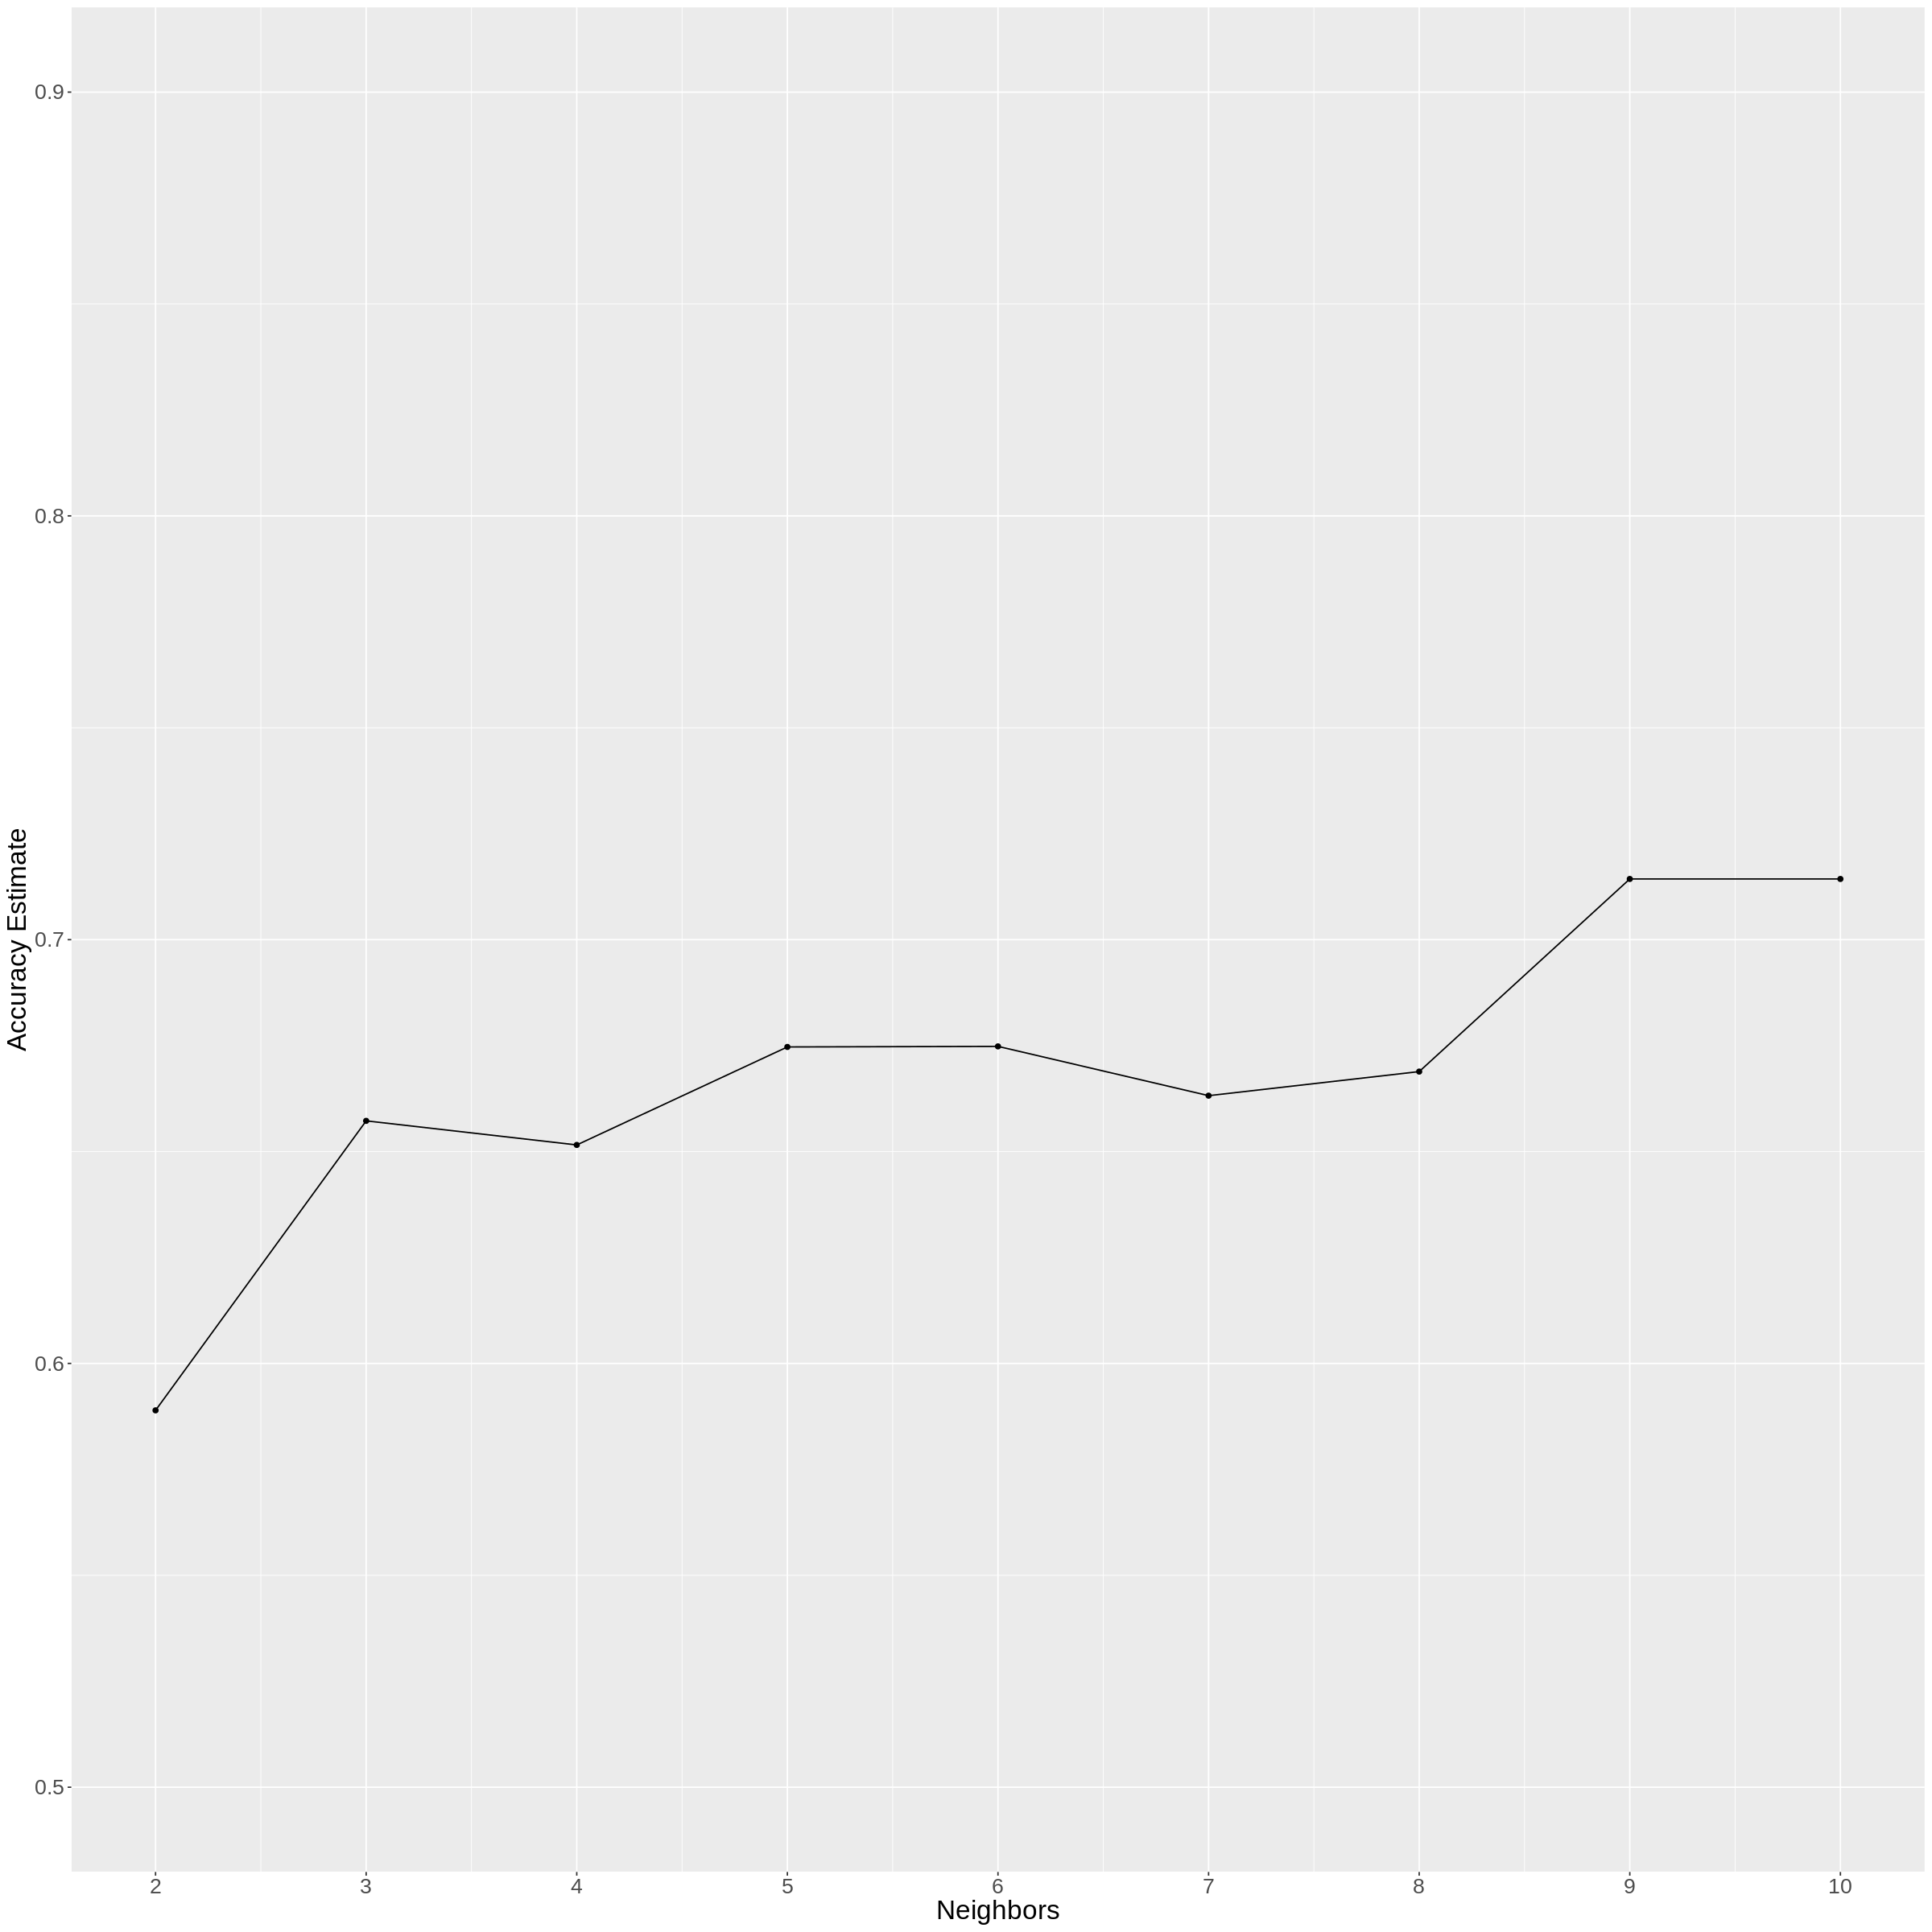

In [160]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  scale_x_continuous(breaks = seq(0, 10, by = 1)) +
  scale_y_continuous(limits = c(0.5, 0.9)) +
  theme(text = element_text(size = 20))

cross_val_plot

Based on the plot, we choose K = 9 as it yields the highest estimated accuracy. Deviating slightly from this value doesn't lead to a significant decrease in accuracy. Moreover, K = 9 is not excessively large, which means that the cost of training the model is still feasible. 

In [161]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
      set_engine("kknn") |>
      set_mode("classification")

In [162]:
heart_disease_fit <- workflow() |>
      add_recipe(heart_desease_recipe) |>
      add_model(knn_spec) |>
      fit(data = heart_disease_train)
heart_disease_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3196347
Best kernel: rectangular
Best k: 9

Pass the fitted model and the test dataset to the predict to prediction.

In [163]:
heart_disease_test_predictions <- predict(heart_disease_fit , heart_disease_test) |>
       bind_cols(heart_disease_test)
head(heart_disease_test_predictions)

.pred_class,num,age,thalach
<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>"
0,0,-2.538019,1.9445017
0,0,-2.410008,0.8847193
0,0,-2.025974,1.0966758
0,0,-2.025974,0.6727629
0,0,-1.897963,1.9445017
0,0,-1.641940,1.2238497


Calculate the accuracy of the classification model.

In [164]:
heart_disease_prediction_accuracy <- heart_disease_test_predictions |>
        metrics(truth = num, estimate = .pred_class) 
heart_disease_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6351351
kap,binary,0.2065131


In [165]:
# TODOs:
# check balance?
# scale?